In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-data/weather_data.csv


### Importing libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/weather-data/weather_data.csv")

# Analyzing and Preprocessing the Dataset

In [4]:
df.head(10)

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [5]:
df.shape

(14, 5)

In [6]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [11]:
df.nunique()

Outlook        3
Temperature    3
Humidity       2
Wind           2
Play           2
dtype: int64

# Encode Strings into numerical values

In [16]:
from sklearn.preprocessing import LabelEncoder 
encode = LabelEncoder()

In [14]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'], dtype='object')

In [20]:
df["encoded_Outlook"] = encode.fit_transform(df["Outlook"])
df["encoded_Temprature"] = encode.fit_transform(df["Temperature"])
df["encoded_Humidity"] = encode.fit_transform(df["Humidity"])
df["encoded_Wind"] = encode.fit_transform(df["Wind"])

In [21]:
x = df[["encoded_Outlook", "encoded_Temprature", "encoded_Humidity", "encoded_Wind"]]

In [22]:
x.head()

,encoded_Outlook,encoded_Temprature,encoded_Humidity,encoded_Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0


In [25]:
y = df.Play
y.head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Play, dtype: object

# Spliting Dataset for Training and Testing

In [26]:
from sklearn.model_selection import train_test_split 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

# Trainig the Model

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

1. criterion="entropy"
This parameter defines how the quality of a split is measured.

"entropy":
Uses Information Gain as the criterion.
The algorithm chooses splits that maximize information gain, i.e., reduce entropy.

use when:
- You want purity-based splitting.
- You’re okay with slightly slower training than "gini".
Other option:
- "gini": Uses Gini Impurity, which is faster but similar in performance.

2. splitter="best"
This parameter decides how the algorithm selects the feature and threshold to split the data at each node.

"best":
- Tries all features and picks the one that results in the best split according to the criterion.
Other option:
- "random": Randomly selects the feature (used for faster training or in ensemble methods like Random Forest).

Use "best" for:
- Higher accuracy (especially for small datasets).
- When training speed is not a major concern.

In [30]:
tree = DecisionTreeClassifier(criterion="entropy", splitter="best")
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
y_pred = tree.predict(x_test)
y_pred

array(['Yes', 'Yes', 'No'], dtype=object)

In [32]:
from sklearn import metrics

In [34]:
report = metrics.classification_report (y_pred, y_test)
print(report)

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [39]:
x.columns

Index(['encoded_Outlook', 'encoded_Temprature', 'encoded_Humidity',
       'encoded_Wind'],
      dtype='object')

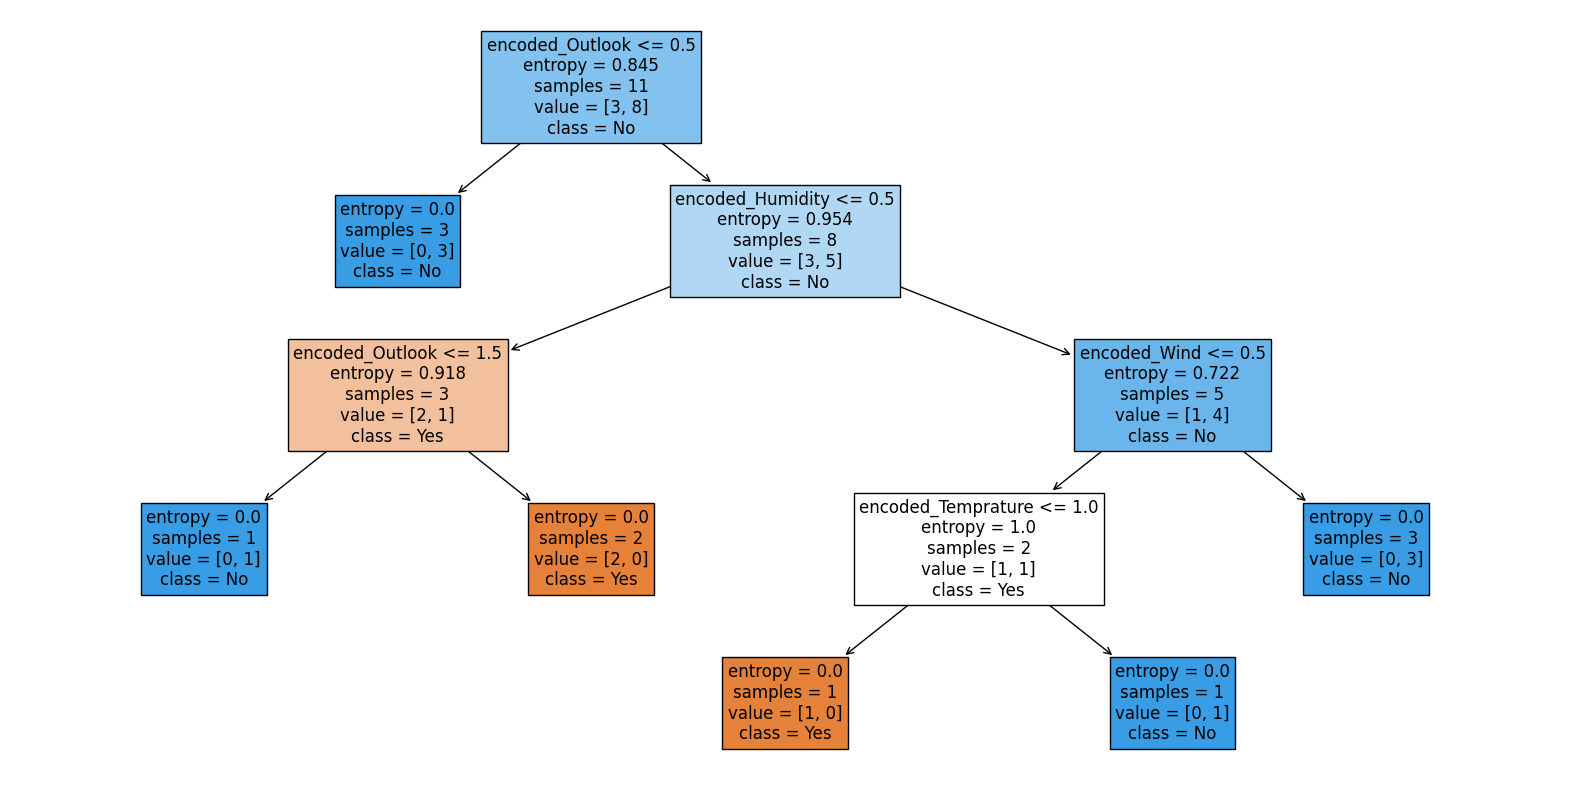

In [38]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names = ['encoded_Outlook','encoded_Temprature','encoded_Humidity','encoded_Wind'], class_names=['Yes','No'], filled = True, fontsize=12)
plt.show()